First let us setup kaggle in our colab notebook

In [8]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Now let us import dataset from kaggle

In [9]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:04<00:00, 39.9MB/s]
100% 163M/163M [00:04<00:00, 34.9MB/s]


In [10]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Extraction of dataset is sucesssfull')

Extraction of dataset is sucesssfull


In [11]:
!ls

addr2line  data  face-mask-dataset.zip	kaggle.json  sample_data


Lets now import libraries required and understanding he dataset

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [13]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:10])
print(with_mask_files[-10:])
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['with_mask_508.jpg', 'with_mask_2270.jpg', 'with_mask_1210.jpg', 'with_mask_685.jpg', 'with_mask_679.jpg', 'with_mask_2925.jpg', 'with_mask_600.jpg', 'with_mask_2221.jpg', 'with_mask_1111.jpg', 'with_mask_2581.jpg']
['with_mask_1398.jpg', 'with_mask_3466.jpg', 'with_mask_359.jpg', 'with_mask_241.jpg', 'with_mask_564.jpg', 'with_mask_2101.jpg', 'with_mask_2821.jpg', 'with_mask_3542.jpg', 'with_mask_1181.jpg', 'with_mask_1977.jpg']
['without_mask_1322.jpg', 'without_mask_2263.jpg', 'without_mask_2063.jpg', 'without_mask_652.jpg', 'without_mask_75.jpg']
['without_mask_919.jpg', 'without_mask_308.jpg', 'without_mask_2023.jpg', 'without_mask_2504.jpg', 'without_mask_106.jpg']


In [14]:
print('No. of images  with mask :', len(with_mask_files))
print('No. of images without mask :', len(without_mask_files))

No. of images  with mask : 3725
No. of images without mask : 3828


Since the image dataset we have contains two classes, we add labels to it as, WITHOUT_MASK = 0 and WITH_MASK = 1 .

After this lets visualize the images

In [15]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])
print(len(with_mask_labels))
print(len(without_mask_labels))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
3725
3828


In [16]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:10])
print(labels[-10:])

7553
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


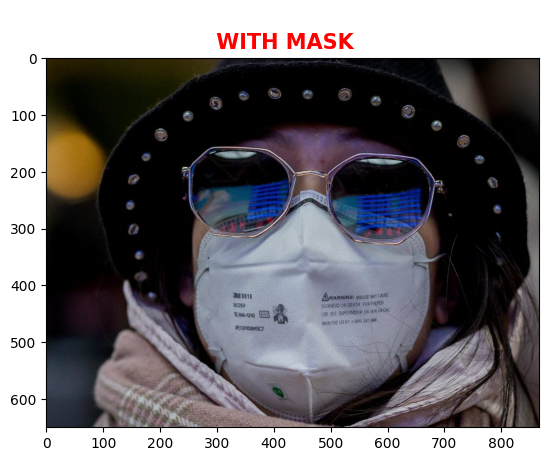

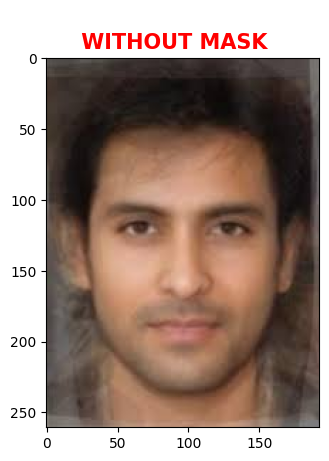

In [17]:
#image with mask
plt.suptitle('\n WITH MASK \n', weight = 'bold', fontsize = 15, color = 'r')
img = mpimg.imread('/content/data/with_mask/with_mask_3466.jpg')
imgplot = plt.imshow(img)
plt.show()

#image without mask
plt.suptitle('\n WITHOUT MASK \n', weight = 'bold', fontsize = 15, color = 'r')
img = mpimg.imread('/content/data/without_mask/without_mask_2023.jpg')
imgplot = plt.imshow(img)
plt.show()

As we can see images are of different sizes, its essential to resize them to same size and convert them to numpy arrays, so we can send them to Convolutional Neural Network

In [18]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Lets see the data variable , and create X and Y variables ie input and prediction variable( 1 or 0)

In [19]:
print('The 10th image is : \n', data[10])
print(' \n The Dimensions are :', data[0].shape)

The 10th image is : 
 [[[ 25  40  59]
  [ 25  40  59]
  [ 25  40  59]
  ...
  [ 22  39  49]
  [ 19  36  46]
  [ 17  34  44]]

 [[ 27  42  61]
  [ 27  42  61]
  [ 26  41  60]
  ...
  [ 24  38  51]
  [ 20  33  46]
  [ 15  29  43]]

 [[ 26  41  62]
  [ 25  40  60]
  [ 26  41  60]
  ...
  [ 24  36  52]
  [ 23  34  51]
  [ 22  33  50]]

 ...

 [[ 55  90 111]
  [ 56  92 109]
  [ 59  94 105]
  ...
  [ 49  76  90]
  [ 45  73  87]
  [ 38  66  79]]

 [[ 46  81 102]
  [ 42  78  95]
  [ 55  89 100]
  ...
  [ 10  31  45]
  [ 10  30  44]
  [  9  30  43]]

 [[ 42  78  99]
  [ 41  77  94]
  [ 50  84  93]
  ...
  [ 16  33  47]
  [ 15  32  46]
  [ 18  35  49]]]
 
 The Dimensions are : (128, 128, 3)


Here we see that its a 128*128 matrix with a depth of 3 ir RGB channels

In [20]:
X = np.array(data)
Y = np.array(labels)

Now, lets split this into training and test data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=5)
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6420, 128, 128, 3) (1133, 128, 128, 3)


Now we scale this data by dividing it this 255, sice max possible value of RGB is (255,255,255)

In [22]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255
print('the scaled version of 10th image is : \n', X_train_scaled[10])

the scaled version of 10th image is : 
 [[[0.4        0.44313725 0.4627451 ]
  [0.42352941 0.4627451  0.47843137]
  [0.47843137 0.51764706 0.51764706]
  ...
  [0.85882353 0.91372549 0.71372549]
  [0.83137255 0.89019608 0.73333333]
  [0.81176471 0.87058824 0.71764706]]

 [[0.40392157 0.44705882 0.4627451 ]
  [0.41568627 0.45882353 0.4745098 ]
  [0.4627451  0.50196078 0.50588235]
  ...
  [0.83529412 0.88627451 0.71764706]
  [0.81176471 0.87058824 0.71764706]
  [0.8        0.85882353 0.70588235]]

 [[0.40392157 0.44705882 0.4627451 ]
  [0.41568627 0.45882353 0.47058824]
  [0.45098039 0.49019608 0.49019608]
  ...
  [0.80392157 0.8627451  0.7254902 ]
  [0.79607843 0.85098039 0.70980392]
  [0.79215686 0.84705882 0.70588235]]

 ...

 [[0.91372549 0.85098039 0.76078431]
  [0.91764706 0.85098039 0.76470588]
  [0.9254902  0.85098039 0.76862745]
  ...
  [0.28235294 0.28235294 0.25882353]
  [0.29411765 0.29019608 0.2745098 ]
  [0.32941176 0.3254902  0.30980392]]

 [[0.85490196 0.74509804 0.6627451

Now with the test and train data ready lets build our Convolutional Neural Network or CNN

In [23]:
#importing dependencies
import tensorflow as tf
from tensorflow import keras

num_of_classes = 2

model1 = keras.Sequential()

model1.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model1.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model1.add(keras.layers.Flatten())

model1.add(keras.layers.Dense(128, activation='relu'))
model1.add(keras.layers.Dropout(0.5))

model1.add(keras.layers.Dense(64, activation='relu'))
model1.add(keras.layers.Dropout(0.5))


model1.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [24]:
history = model1.fit(X_train_scaled, Y_train, validation_split=0.15, epochs=7)

Epoch 1/7
171/171 [==============================] - 16s 25ms/step - loss: 0.4911 - acc: 0.7788 - val_loss: 0.2962 - val_acc: 0.8795
Epoch 2/7
171/171 [==============================] - 3s 18ms/step - loss: 0.3029 - acc: 0.8803 - val_loss: 0.2439 - val_acc: 0.8879
Epoch 3/7
171/171 [==============================] - 3s 18ms/step - loss: 0.2679 - acc: 0.8944 - val_loss: 0.2587 - val_acc: 0.8889
Epoch 4/7
171/171 [==============================] - 3s 18ms/step - loss: 0.2193 - acc: 0.9130 - val_loss: 0.2167 - val_acc: 0.9045
Epoch 5/7
171/171 [==============================] - 3s 19ms/step - loss: 0.1943 - acc: 0.9254 - val_loss: 0.2128 - val_acc: 0.9107
Epoch 6/7
171/171 [==============================] - 3s 18ms/step - loss: 0.1701 - acc: 0.9342 - val_loss: 0.2141 - val_acc: 0.9086
Epoch 7/7
171/171 [==============================] - 3s 18ms/step - loss: 0.1465 - acc: 0.9443 - val_loss: 0.2098 - val_acc: 0.9180


Lets now find the accuracy of our model

In [26]:
loss, accuracy = model1.evaluate(X_test_scaled, Y_test)
print('Test Accuracy is :', accuracy)

36/36 [==============================] - 0s 11ms/step - loss: 0.2644 - acc: 0.8950
Test Accuracy is : 0.89496910572052


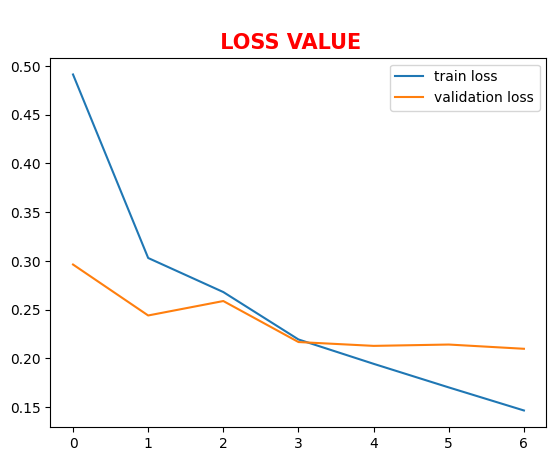

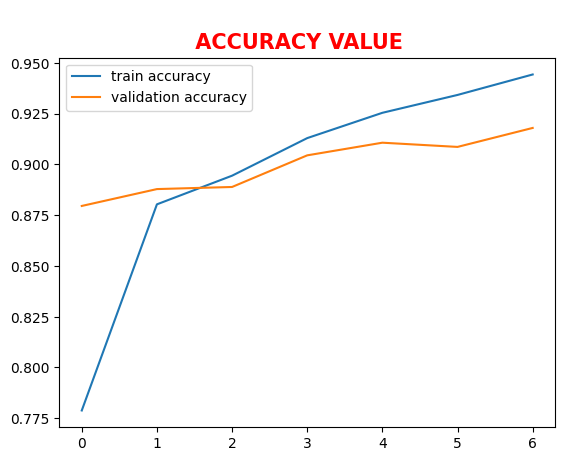

In [27]:
h = history

plt.suptitle('\n LOSS VALUE \n', weight = 'bold', fontsize = 15, color = 'r')
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.suptitle('\n ACCURACY VALUE \n', weight = 'bold', fontsize = 15, color = 'r')
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Now lets build a preictive system so we can give custom input to our model

Give the image path for predction: /content/Custom_image_1.jpg
Give the image path for predction: /content/Custom_image_2.jpg


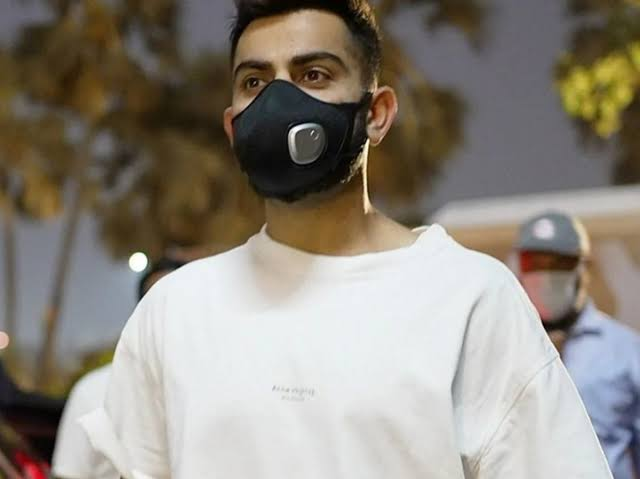

1/1 [==============================] - 0s 19ms/step
[[0.3096414 0.6774538]]
1
The person in the image is wearing a mask


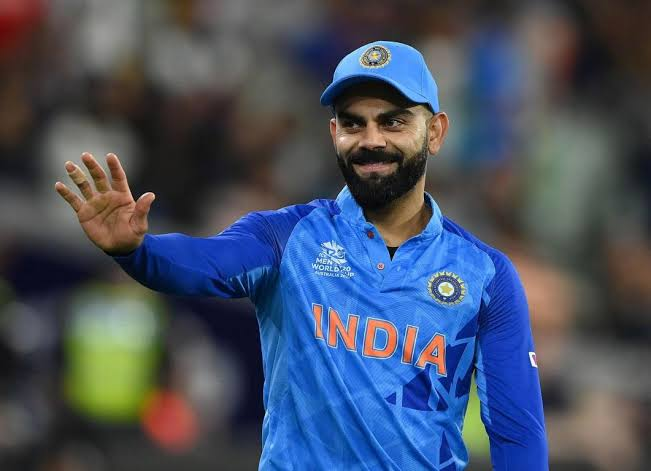

[[0.55203694 0.454675  ]]
0
The person in the image is not wearing a mask


In [34]:
input_image_path_1 = input('Give the image path for predction: ')
input_image_path_2 = input('Give the image path for predction: ')

input_image_1 = cv2.imread(input_image_path_1)
input_image_2 = cv2.imread(input_image_path_2)

cv2_imshow(input_image_1)

input_image_resized_1 = cv2.resize(input_image_1, (128,128))
input_image_resized_2 = cv2.resize(input_image_2, (128,128))

input_image_scaled_1 = input_image_resized_1/255
input_image_scaled_2 = input_image_resized_2/255

input_image_reshaped_1 = np.reshape(input_image_scaled_1, [1,128,128,3])
input_image_reshaped_2 = np.reshape(input_image_scaled_2, [1,128,128,3])

input_prediction_1 = model1.predict(input_image_reshaped_1)
input_prediction_2 = model1.predict(input_image_reshaped_2)

print(input_prediction_1)


input_pred_label_1 = np.argmax(input_prediction_1)

print(input_pred_label_1)


if input_pred_label_1 == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

cv2_imshow(input_image_2)
print(input_prediction_2)


input_pred_label_2 = np.argmax(input_prediction_2)

print(input_pred_label_2)


if input_pred_label_2 == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')